# Classification by Random Forest and Decision Tree of the resulting genotype for position 1534 of kdr mutations in Aedes aegypti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import choice
import openpyxl
from imblearn.over_sampling import RandomOverSampler

### Base de datos para entrenamiento

In [2]:
datos = pd.read_excel('base_de_datos_1534.xlsx', sheet_name='Hoja1')
datos

,id_muestra,Placa,Distrito,numero_distrito,Muestra,Tm_1534,Tm_Estandar_1534,DifTmSS,DifTmSR,DifTmRR,DifTmSS_abs,DifTmSR_abs,DifTmRR_abs,Genotipo_1534,Abs_260,Abs_260_280,Abs_260_230,Criterio_260_280,Criterio_260_230
0,0,1,Hurlingham,135,1,82.13,82.36,0.42,0.32,-0.23,0.42,0.32,0.23,Heterocigoto,1.5,1.90,1.71,1,3
1,1,1,Hurlingham,135,2,82.42,82.36,0.71,0.61,0.06,0.71,0.61,0.06,Resistente,1.3,1.90,1.79,1,3
2,2,1,Hurlingham,135,3,82.43,82.36,0.72,0.62,0.07,0.72,0.62,0.07,Resistente,3.5,1.94,1.94,1,2
3,3,1,Hurlingham,135,4,82.16,82.36,0.45,0.35,-0.20,0.45,0.35,0.20,Heterocigoto,1.0,1.97,1.86,1,2
4,4,1,Hurlingham,135,5,82.27,82.36,0.56,0.46,-0.09,0.56,0.46,0.09,Heterocigoto,3.5,1.90,2.00,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,2,Pergamino,81,10,82.36,82.34,0.02,-0.05,-0.16,0.02,0.05,0.16,Sensible,2.1,2.01,2.06,1,1
153,153,2,Pergamino,81,11,82.47,82.41,0.13,0.06,-0.05,0.13,0.06,0.05,Heterocigoto,5.1,2.02,2.12,1,1
154,154,2,Pergamino,81,12,82.42,82.41,0.08,0.01,-0.10,0.08,0.01,0.10,Heterocigoto,3.9,2.07,2.22,1,1
155,155,2,Pergamino,81,14,82.42,82.41,0.08,0.01,-0.10,0.08,0.01,0.10,Heterocigoto,1.3,1.90,2.09,1,1


In [3]:
datos['Genotipo_1534'].value_counts()

Genotipo_1534
Resistente      91
Heterocigoto    58
Sensible         8
Name: count, dtype: int64

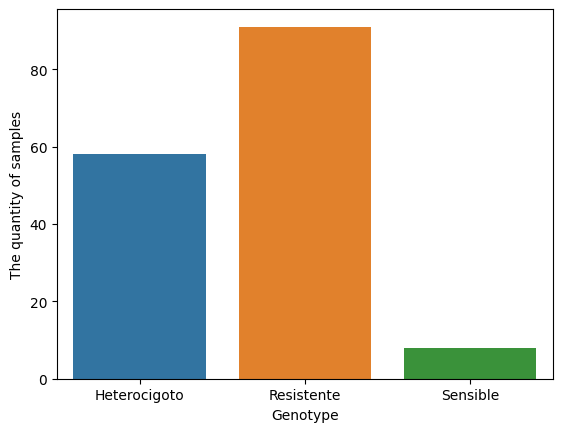

In [4]:
sns.countplot(x=datos['Genotipo_1534'])

# Agregar etiquetas a los ejes
plt.xlabel('Genotype')  # Etiqueta para el eje X
plt.ylabel('The quantity of samples')  # Etiqueta para el eje Y

# Mostrar el gráfico
plt.show()

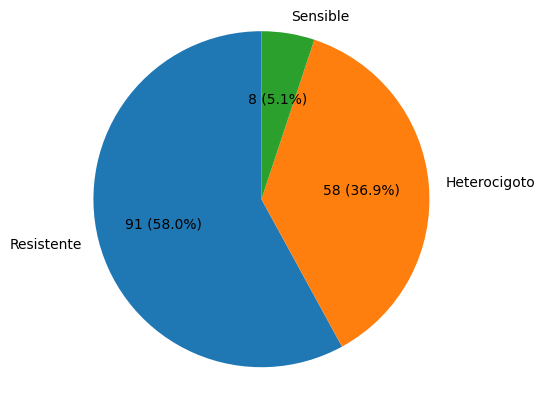

In [5]:
# Obtén los conteos de cada categoría en 'Genotipo_1016'
conteos_genotipo = datos['Genotipo_1534'].value_counts()

plt.pie(conteos_genotipo, labels=conteos_genotipo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo) / 100, p), startangle=90)

# Ajustar el diseño para que la torta se vea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

### Regresión

In [6]:
def convertir_sensible(text):
    if text == 'Sensible':
        variable = 1
    else:
        variable = 0
    return variable

def convertir_heterocigoto(text):
    if text == 'Heterocigoto':
        variable = 1
    else:
        variable = 0
    return variable

def convertir_resistente(text):
    if text == 'Resistente':
        variable = 1
    else:
        variable = 0
    return variable

datos['EsResistente'] = datos['Genotipo_1534'].apply(convertir_resistente)
datos['EsSensible'] = datos['Genotipo_1534'].apply(convertir_sensible)
datos['EsHeterocigoto'] = datos['Genotipo_1534'].apply(convertir_heterocigoto)

In [7]:
import statsmodels.formula.api as smf

mod = smf.ols("EsHeterocigoto ~ Tm_1534 + DifTmSS_abs + DifTmSR_abs + DifTmRR_abs", datos).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:         EsHeterocigoto   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     50.38
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           6.14e-27
Time:                        16:56:29   Log-Likelihood:                -42.148
No. Observations:                 157   AIC:                             94.30
Df Residuals:                     152   BIC:                             109.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.9486      6.286      4.764      

### Base de datos para testing

In [8]:
base_test = pd.read_excel('base_test_1534.xlsx', sheet_name='Hoja1')
base_test

,id_muestra,Placa,Distrito,numero_distrito,Muestra,Tm_1534,Tm_Estandar_1534,DifTmSS,DifTmSR,DifTmRR,DifTmSS_abs,DifTmSR_abs,DifTmRR_abs,Genotipo_1534,Abs_260,Abs_260_280,Abs_260_230,Criterio_260_280,Criterio_260_230
0,0,3,Pergamino,81,17,82.34,82.37,-0.03,-0.18,-0.68,0.03,0.18,0.68,Sensible,4.6,2.04,2.17,1,1
1,1,3,Pergamino,81,18,82.42,82.52,0.05,-0.10,-0.60,0.05,0.10,0.60,Heterocigoto,3.4,1.98,2.07,1,1
2,2,3,Pergamino,81,19,82.37,82.37,0.00,-0.15,-0.65,0.00,0.15,0.65,Sensible,3.4,2.02,2.08,1,1
3,3,3,Pergamino,81,20,82.42,82.52,0.05,-0.10,-0.60,0.05,0.10,0.60,Heterocigoto,2.8,1.95,1.89,1,1
4,4,3,Pergamino,81,21,83.11,83.02,0.74,0.59,0.09,0.74,0.59,0.09,Resistente,1.4,1.90,1.96,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,3,Escobar,116,4,82.28,82.37,-0.09,-0.24,-0.74,0.09,0.24,0.74,Sensible,3.1,2.02,2.34,1,1
78,78,3,Escobar,116,5,83.00,83.02,0.63,0.48,-0.02,0.63,0.48,0.02,Resistente,1.6,2.06,2.09,1,1
79,79,3,Escobar,116,6,83.11,83.02,0.74,0.59,0.09,0.74,0.59,0.09,Resistente,8.2,2.14,2.08,4,1
80,80,3,Escobar,116,7,83.11,83.02,0.74,0.59,0.09,0.74,0.59,0.09,Resistente,7.1,2.02,2.33,1,1


In [9]:
base_test['Genotipo_1534'].value_counts()

Genotipo_1534
Heterocigoto    41
Resistente      34
Sensible         7
Name: count, dtype: int64

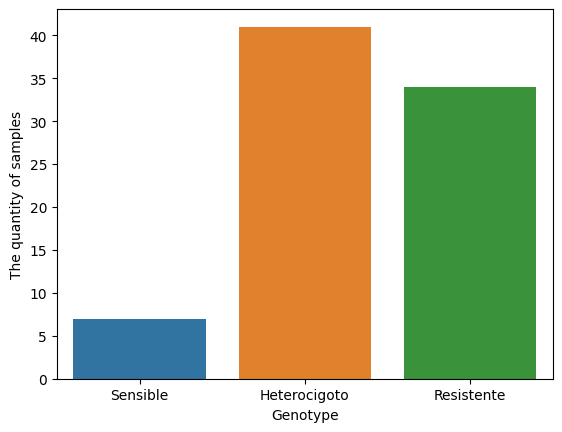

In [10]:
sns.countplot(x=base_test['Genotipo_1534'])

# Agregar etiquetas a los ejes
plt.xlabel('Genotype')  # Etiqueta para el eje X
plt.ylabel('The quantity of samples')  # Etiqueta para el eje Y

# Mostrar el gráfico
plt.show()

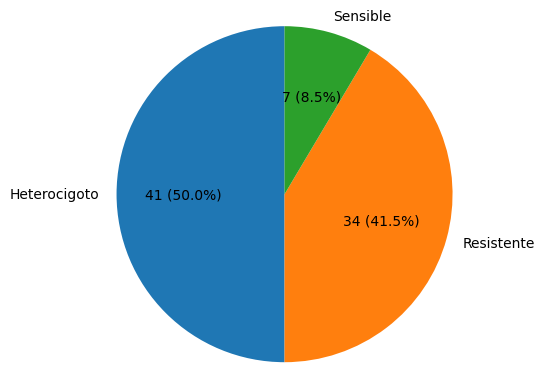

In [11]:
# Obtén los conteos de cada categoría en 'Genotipo_1016'
conteos_genotipo = base_test['Genotipo_1534'].value_counts()

plt.pie(conteos_genotipo, labels=conteos_genotipo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo) / 100, p), startangle=90)

# Ajustar el diseño para que la torta se vea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

---

### Train Test Split
Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba

In [12]:
X_train = datos[['id_muestra', 'Tm_1534', 'DifTmSS_abs', 'DifTmSR_abs', 'DifTmRR_abs']]
y_train = datos['Genotipo_1534'] # Nos quedamos sólo con el target

In [13]:
X_test = base_test[['id_muestra', 'Tm_1534', 'DifTmSS_abs', 'DifTmSR_abs', 'DifTmRR_abs']]
y_test = base_test['Genotipo_1534'] # Nos quedamos sólo con el target

In [14]:
# # 75 % de entrenamiento, 25 % de testeo
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape

(157, 5)

In [16]:
X_test.shape

(82, 5)

--- 

### SMOTE
Balanceamos la información

In [17]:
# from imblearn.over_sampling import SMOTE

# # Inicializar el objeto SMOTE
# smote = SMOTE(random_state=42)

# # Aplicar SMOTE solo al conjunto de entrenamiento para evitar data leakage
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Concatenar los datos equilibrados
# datos_equilibrados = pd.concat([pd.DataFrame(X_train, columns=X_train.columns), pd.Series(y_train, name='Genotipo_1534')], axis=1)

In [18]:
# # Obtén los conteos de cada categoría en 'Genotipo_1534'
# conteos_genotipo_resampleo = datos_equilibrados['Genotipo_1534'].value_counts()

# plt.pie(conteos_genotipo_resampleo, labels=conteos_genotipo_resampleo.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(conteos_genotipo_resampleo) / 100, p), startangle=90)

# # Ajustar el diseño para que la torta se vea circular
# plt.axis('equal')

# # Mostrar el gráfico
# plt.show()

In [19]:
# datos_equilibrados['Genotipo_1534'].value_counts()

----

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [21]:
# Definir el clasificador
dtree = DecisionTreeClassifier(random_state=42, criterion = 'entropy')

best_dtree = dtree.fit(X_train.drop(columns=['id_muestra']),y_train)

In [22]:
# Predicción
y_test_pred_dtree = best_dtree.predict(X_test.drop(columns=['id_muestra']))

In [23]:
# Métrica - radio entre aciertos y cantidad total de predicciones
from sklearn.metrics import accuracy_score
print("Índice Accuracy:", accuracy_score(y_test, y_test_pred_dtree))

# Calcular el índice Kappa
from sklearn.metrics import cohen_kappa_score
print("Índice Kappa:", cohen_kappa_score(y_test, y_test_pred_dtree))

Índice Accuracy: 0.8048780487804879
Índice Kappa: 0.6939584791229298


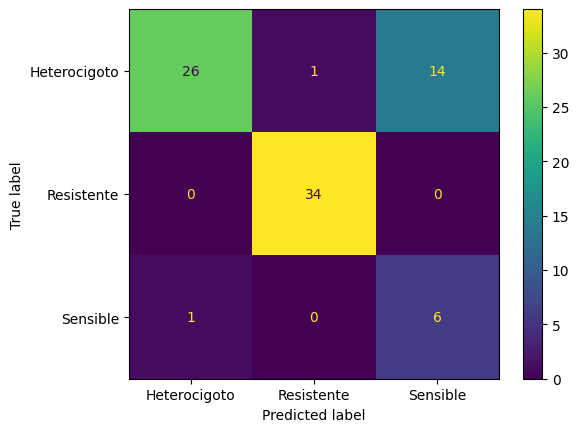

In [24]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_test_pred_dtree,labels=best_dtree.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_dtree.classes_).plot()

In [25]:
from sklearn.model_selection import cross_val_score

scores_dtree = cross_val_score(best_dtree, X_train.drop(columns=['id_muestra']), y_train, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores_dtree*100)
print("Mean accuracy: ", scores_dtree.mean()*100)
print("Standard deviation: ", scores_dtree.std()*100)


Accuracy scores for each fold: [ 90.625       96.875       70.96774194  77.41935484 100.        ]
Mean accuracy:  87.17741935483872
Standard deviation:  11.210003766426139


In [26]:
# Visualizacion del arbol
from sklearn import tree

r = export_text(best_dtree, feature_names=list(X_train.drop(columns=['id_muestra']).columns))
print(r)

|--- DifTmSR_abs <= 0.47
|   |--- Tm_1534 <= 82.64
|   |   |--- DifTmSS_abs <= 0.05
|   |   |   |--- class: Sensible
|   |   |--- DifTmSS_abs >  0.05
|   |   |   |--- DifTmSR_abs <= 0.02
|   |   |   |   |--- DifTmSR_abs <= 0.00
|   |   |   |   |   |--- class: Sensible
|   |   |   |   |--- DifTmSR_abs >  0.00
|   |   |   |   |   |--- DifTmSR_abs <= 0.01
|   |   |   |   |   |   |--- class: Heterocigoto
|   |   |   |   |   |--- DifTmSR_abs >  0.01
|   |   |   |   |   |   |--- class: Sensible
|   |   |   |--- DifTmSR_abs >  0.02
|   |   |   |   |--- DifTmRR_abs <= 0.75
|   |   |   |   |   |--- DifTmSR_abs <= 0.11
|   |   |   |   |   |   |--- class: Heterocigoto
|   |   |   |   |   |--- DifTmSR_abs >  0.11
|   |   |   |   |   |   |--- DifTmSS_abs <= 0.40
|   |   |   |   |   |   |   |--- Tm_1534 <= 82.04
|   |   |   |   |   |   |   |   |--- DifTmSS_abs <= 0.23
|   |   |   |   |   |   |   |   |   |--- DifTmSR_abs <= 0.12
|   |   |   |   |   |   |   |   |   |   |--- class: Heterocigoto
|   |  

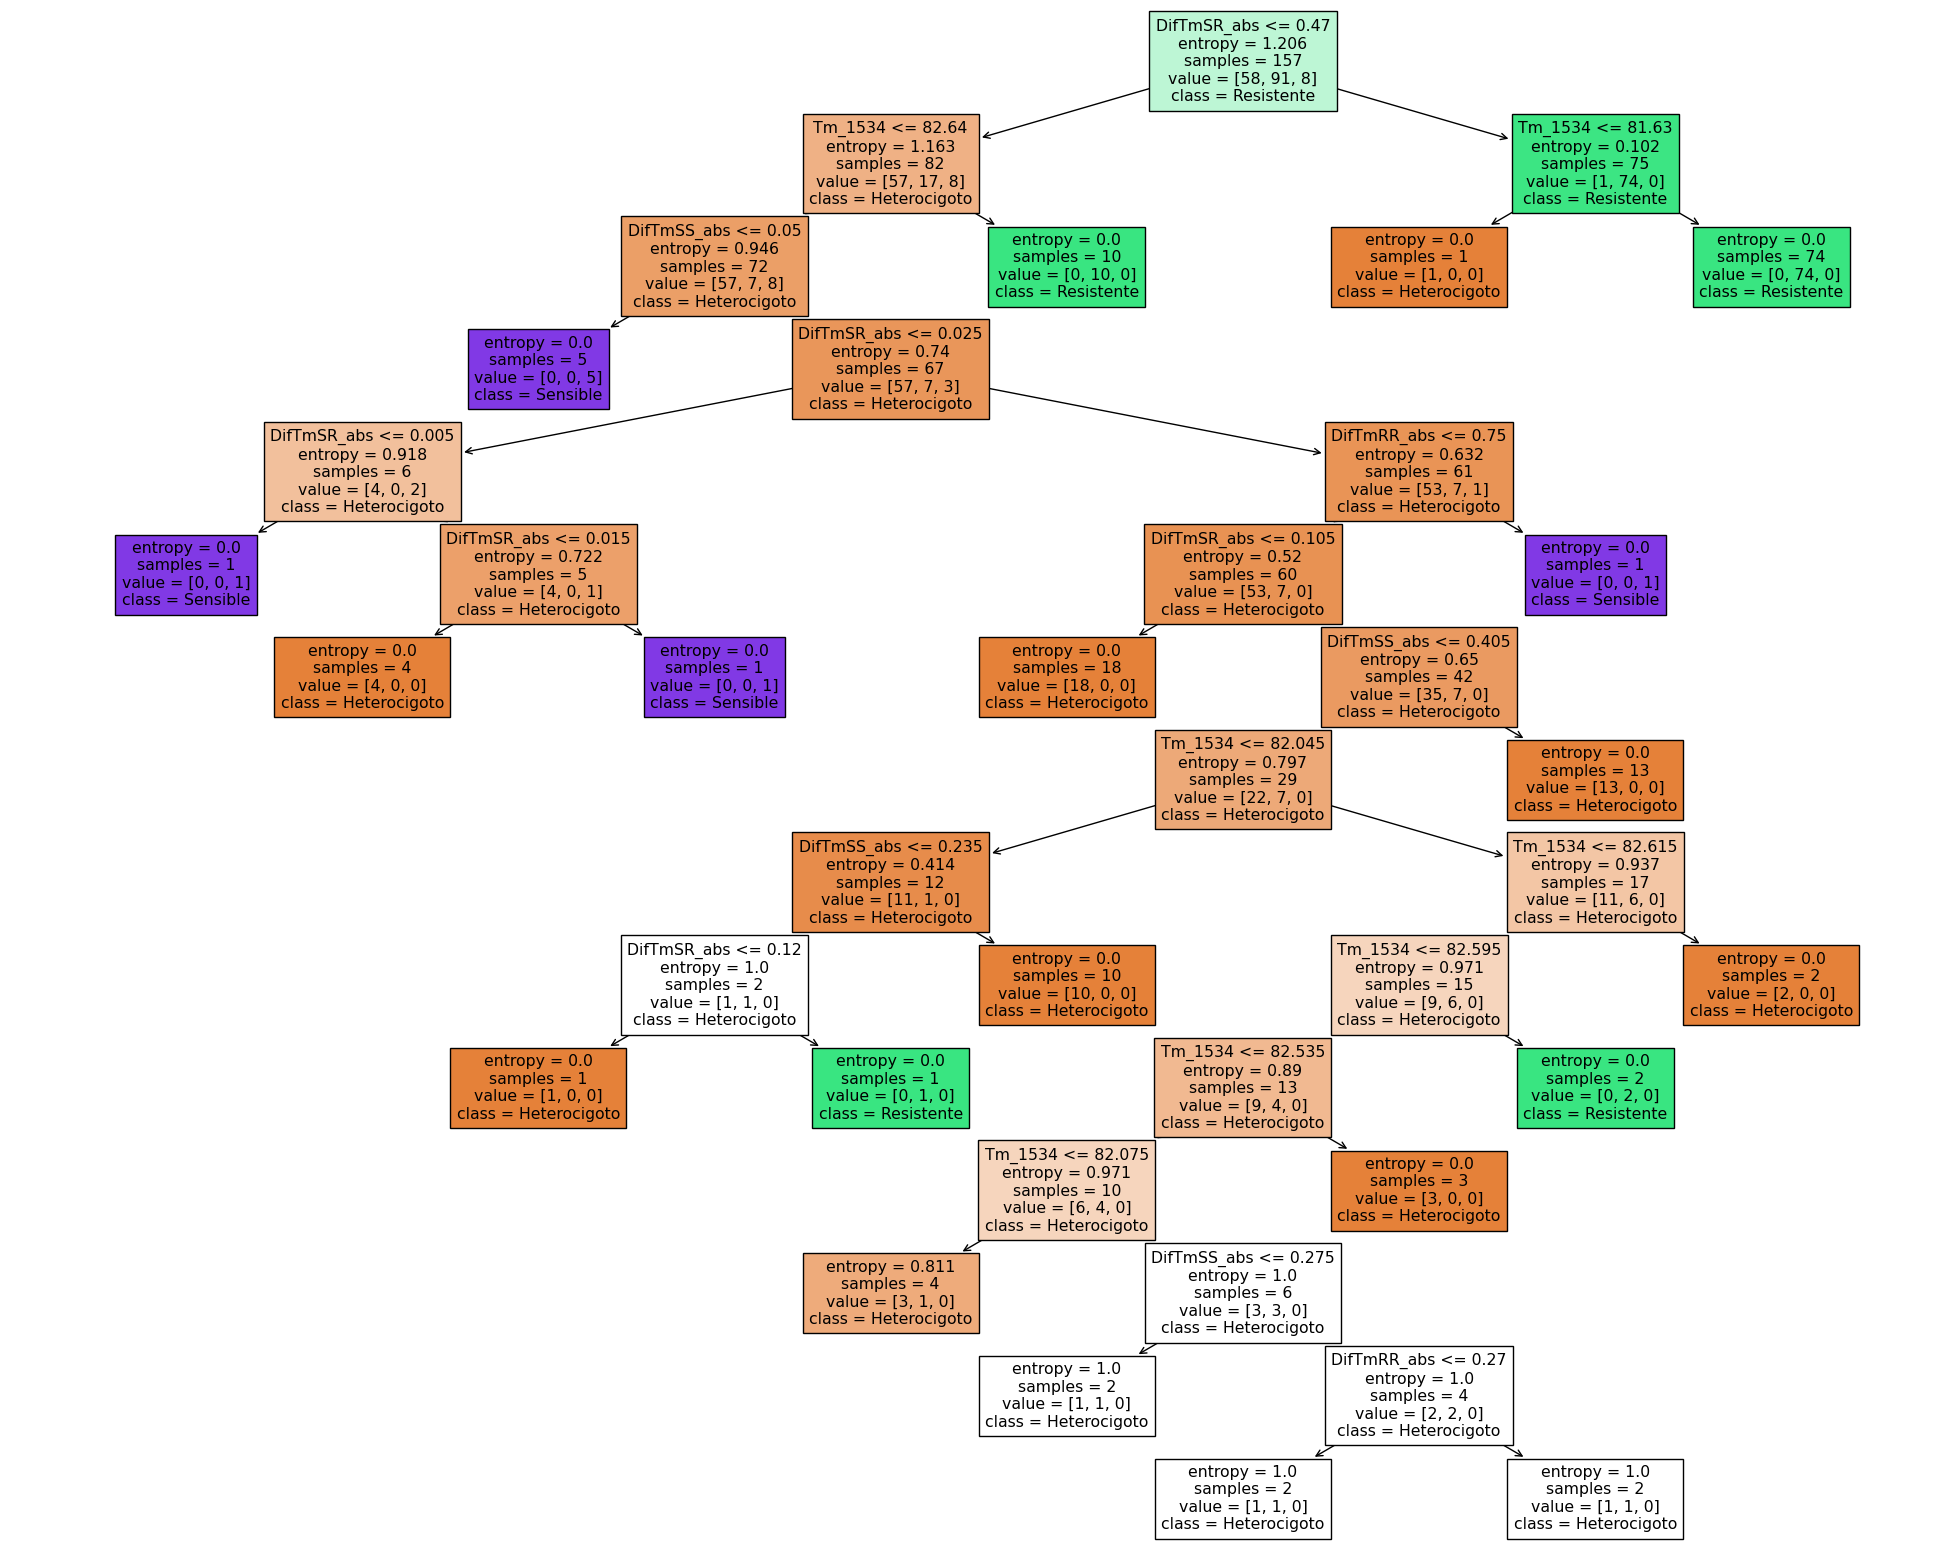

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_dtree, 
                   feature_names = X_train.drop(columns=['id_muestra']).columns,  
                   class_names=list(map(str, best_dtree.classes_)),
                   filled = True)

# Guarda la figura en un archivo PNG
# fig.savefig('arbol_decision.png')

In [28]:
# Prediccion y evaluacion
model_predictions_proba = best_dtree.predict_proba(X_test.drop(columns=['id_muestra']))

Text(0.5, 1.0, 'Probability Density Plot')

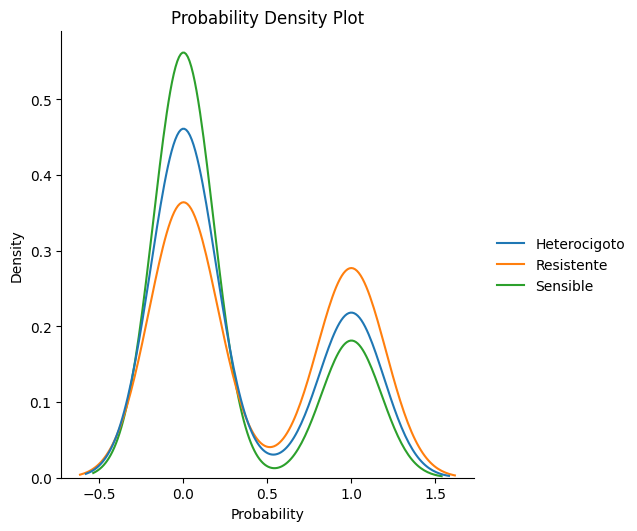

In [29]:
# Crear un DataFrame con las predicciones de probabilidad
df_prob_dtree = pd.DataFrame(model_predictions_proba, columns=['Heterocigoto', 'Resistente', 'Sensible'])

sns.displot(df_prob_dtree, kind="kde")

# Agregar etiquetas al gráfico
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("Probability Density Plot")

In [30]:
# Matriz de confusión
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test, y_test_pred_dtree))

# True Positives  ---  False Negatives

# False Positives ---  True Negatives

[[26  1 14]
 [ 0 34  0]
 [ 1  0  6]]


* Con la métrica de precisión (precision) podemos medir la calidad del modelo de machine learning en tareas de clasificación. En el ejemplo, se refiere a que la precisión es la respuesta a la pregunta ¿Qué porcentaje de los genotipos que el modelo predijo como heterocigotos, realmente lo hicieron?
* La métrica de exhaustividad (recall) nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. En el ejemplo, se refiere a que la exhaustividad es la respuesta a la pregunta ¿qué porcentaje de los genotipos que son heterocigotos somos capaces de identificar?

In [32]:
print(classification_report(y_test,y_test_pred_dtree))

              precision    recall  f1-score   support

Heterocigoto       0.96      0.63      0.76        41
  Resistente       0.97      1.00      0.99        34
    Sensible       0.30      0.86      0.44         7

    accuracy                           0.80        82
   macro avg       0.74      0.83      0.73        82
weighted avg       0.91      0.80      0.83        82



In [33]:
df_pred_model_final = pd.DataFrame()
df_pred_model_final['id_muestra'] = X_test[["id_muestra"]]
df_pred_model_final['target_real'] = y_test
df_pred_model_final["target_modelo"] = y_test_pred_dtree
df_pred_model_final["prob"] = list(model_predictions_proba)
df_pred_model_final["prob"] = df_pred_model_final["prob"].astype(str)
df_pred_model_final['Tm_1534'] = list(X_test['Tm_1534'])
df_pred_model_final.reset_index(inplace=True)

In [34]:
df_pred_model_final.drop(columns = ['index'], inplace = True)

In [35]:
df_pred_model_final

,id_muestra,target_real,target_modelo,prob,Tm_1534
0,0,Sensible,Sensible,[0. 0. 1.],82.34
1,1,Heterocigoto,Heterocigoto,[1. 0. 0.],82.42
2,2,Sensible,Sensible,[0. 0. 1.],82.37
3,3,Heterocigoto,Heterocigoto,[1. 0. 0.],82.42
4,4,Resistente,Resistente,[0. 1. 0.],83.11
...,...,...,...,...,...
77,77,Sensible,Heterocigoto,[0.5 0.5 0. ],82.28
78,78,Resistente,Resistente,[0. 1. 0.],83.00
79,79,Resistente,Resistente,[0. 1. 0.],83.11
80,80,Resistente,Resistente,[0. 1. 0.],83.11


In [36]:
# Separar la columna 'prob' en tres columnas
df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_final['prob'].str.strip('[]').str.split(expand=True)

# Convertir las nuevas columnas a números
df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_final[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']].astype(float)

# Eliminar la columna original 'prob'
df_pred_model_final.drop('prob', axis=1, inplace=True)

# Mostrar el DataFrame resultante
df_pred_model_final

,id_muestra,target_real,target_modelo,Tm_1534,prob_heterocigoto,prob_resistente,prob_sensible
0,0,Sensible,Sensible,82.34,0.0,0.0,1.0
1,1,Heterocigoto,Heterocigoto,82.42,1.0,0.0,0.0
2,2,Sensible,Sensible,82.37,0.0,0.0,1.0
3,3,Heterocigoto,Heterocigoto,82.42,1.0,0.0,0.0
4,4,Resistente,Resistente,83.11,0.0,1.0,0.0
...,...,...,...,...,...,...,...
77,77,Sensible,Heterocigoto,82.28,0.5,0.5,0.0
78,78,Resistente,Resistente,83.00,0.0,1.0,0.0
79,79,Resistente,Resistente,83.11,0.0,1.0,0.0
80,80,Resistente,Resistente,83.11,0.0,1.0,0.0


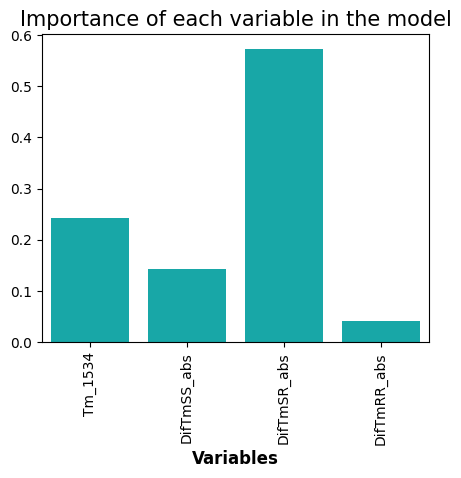

In [37]:
imp_variables = dtree.feature_importances_

plt.figure(figsize=(5, 4))
sns.barplot(x=X_test.drop(columns=['id_muestra']).columns, y=imp_variables, color="c")
plt.xlabel("Variables", fontweight="black", fontsize=12)
plt.title("Importance of each variable in the model", fontsize=15, color="black")
plt.xticks(rotation=90, size=10)
plt.show()

In [38]:
print(classification_report(y_test,y_test_pred_dtree))

              precision    recall  f1-score   support

Heterocigoto       0.96      0.63      0.76        41
  Resistente       0.97      1.00      0.99        34
    Sensible       0.30      0.86      0.44         7

    accuracy                           0.80        82
   macro avg       0.74      0.83      0.73        82
weighted avg       0.91      0.80      0.83        82



In [39]:
# df_pred_model_final.to_excel('prediccion.xlsx', index=False)  

----------- 

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Inicializar el clasificador de bosque aleatorio
clf = RandomForestClassifier(n_estimators=150, random_state=42)

# Ajustar el modelo
clf.fit(X_train.drop(columns=['id_muestra']), y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [42]:
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test.drop(columns=['id_muestra']))

In [43]:
# Métrica - radio entre aciertos y cantidad total de predicciones
from sklearn.metrics import accuracy_score
print("Índice Accuracy:", accuracy_score(y_test, y_pred))

# Calcular el índice Kappa
from sklearn.metrics import cohen_kappa_score
print("Índice Kappa:", cohen_kappa_score(y_test, y_pred))

Índice Accuracy: 0.926829268292683
Índice Kappa: 0.8753483658474791


In [44]:
from sklearn.model_selection import cross_val_score

scores_random = cross_val_score(clf, X_train.drop(columns=['id_muestra']), y_train, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores_random*100)
print("Mean accuracy: ", scores_random.mean()*100)
print("Standard deviation: ", scores_random.std()*100)


Accuracy scores for each fold: [90.625      96.875      70.96774194 77.41935484 93.5483871 ]
Mean accuracy:  85.88709677419357
Standard deviation:  9.96159541411861


In [45]:
# Prediccion y evaluacion
model_predictions_bosque = clf.predict_proba(X_test.drop(columns=['id_muestra']))

Text(0.5, 1.0, 'Probability Density Plot')

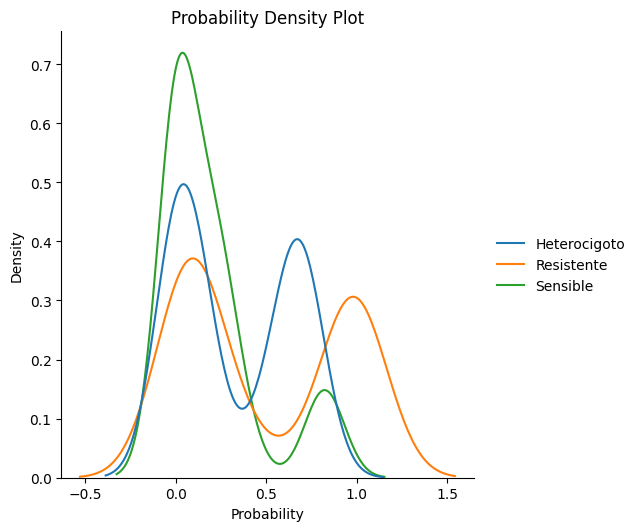

In [46]:
df_prob_random = pd.DataFrame(model_predictions_bosque, columns=['Heterocigoto', 'Resistente', 'Sensible'])
sns.displot(df_prob_random, kind="kde")

# Agregar etiquetas al gráfico
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("Probability Density Plot")

In [47]:
df_pred_model_bosque = pd.DataFrame()
df_pred_model_bosque['id_muestra'] = X_test[["id_muestra"]]
df_pred_model_bosque['target_real'] = y_test
df_pred_model_bosque["target_modelo"] = y_pred
df_pred_model_bosque["prob"] = list(model_predictions_bosque)
df_pred_model_bosque["prob"] = df_pred_model_bosque["prob"].astype(str)
df_pred_model_bosque['Tm_1534'] = list(X_test['Tm_1534'])
df_pred_model_bosque.reset_index(inplace=True)

In [48]:
df_pred_model_bosque.drop(columns = ['index'], inplace = True)

In [49]:
df_pred_model_bosque

,id_muestra,target_real,target_modelo,prob,Tm_1534
0,0,Sensible,Sensible,[0.17333333 0.02666667 0.8 ],82.34
1,1,Heterocigoto,Heterocigoto,[0.67555556 0.07111111 0.25333333],82.42
2,2,Sensible,Sensible,[0.16666667 0.01333333 0.82 ],82.37
3,3,Heterocigoto,Heterocigoto,[0.67555556 0.07111111 0.25333333],82.42
4,4,Resistente,Resistente,[0. 1. 0.],83.11
...,...,...,...,...,...
77,77,Sensible,Heterocigoto,[0.65533333 0.22466667 0.12 ],82.28
78,78,Resistente,Resistente,[0.01333333 0.98666667 0. ],83.00
79,79,Resistente,Resistente,[0. 1. 0.],83.11
80,80,Resistente,Resistente,[0. 1. 0.],83.11


In [50]:
# Separar la columna 'prob' en tres columnas
df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_bosque['prob'].str.strip('[]').str.split(expand=True)

# Convertir las nuevas columnas a números
df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']] = df_pred_model_bosque[['prob_heterocigoto', 'prob_resistente', 'prob_sensible']].astype(float)

# Eliminar la columna original 'prob'
df_pred_model_bosque.drop('prob', axis=1, inplace=True)

# Mostrar el DataFrame resultante
df_pred_model_bosque

,id_muestra,target_real,target_modelo,Tm_1534,prob_heterocigoto,prob_resistente,prob_sensible
0,0,Sensible,Sensible,82.34,0.173333,0.026667,0.800000
1,1,Heterocigoto,Heterocigoto,82.42,0.675556,0.071111,0.253333
2,2,Sensible,Sensible,82.37,0.166667,0.013333,0.820000
3,3,Heterocigoto,Heterocigoto,82.42,0.675556,0.071111,0.253333
4,4,Resistente,Resistente,83.11,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...
77,77,Sensible,Heterocigoto,82.28,0.655333,0.224667,0.120000
78,78,Resistente,Resistente,83.00,0.013333,0.986667,0.000000
79,79,Resistente,Resistente,83.11,0.000000,1.000000,0.000000
80,80,Resistente,Resistente,83.11,0.000000,1.000000,0.000000


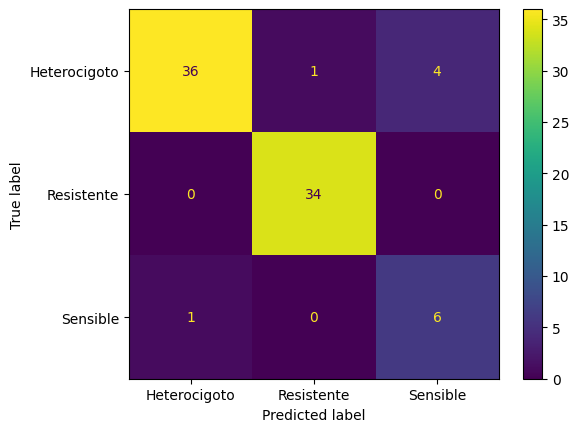

In [51]:
cm_random = confusion_matrix(y_test,y_pred,labels=['Heterocigoto', 'Resistente', 'Sensible'])
ConfusionMatrixDisplay(cm_random, display_labels=['Heterocigoto', 'Resistente', 'Sensible']).plot()

In [52]:
print(confusion_matrix(y_test, y_pred))

# True Positives  ---  False Negatives

# False Positives ---  True Negatives

[[36  1  4]
 [ 0 34  0]
 [ 1  0  6]]


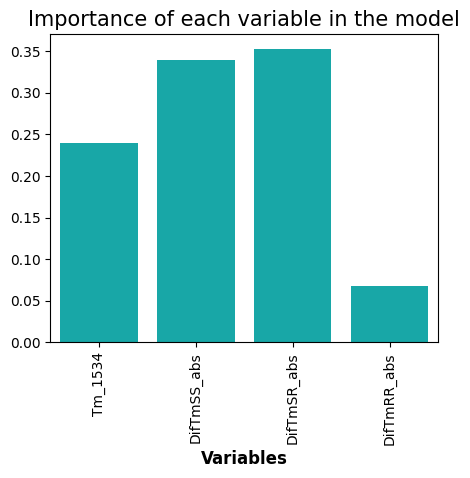

In [53]:
imp_variables = clf.feature_importances_

plt.figure(figsize=(5, 4))
sns.barplot(x=X_train.drop(columns=['id_muestra']).columns, y=imp_variables, color="c")
plt.xlabel("Variables", fontweight="black", fontsize=12)
plt.title("Importance of each variable in the model", fontsize=15, color="black")
plt.xticks(rotation=90, size=10)
plt.show()

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

Heterocigoto       0.97      0.88      0.92        41
  Resistente       0.97      1.00      0.99        34
    Sensible       0.60      0.86      0.71         7

    accuracy                           0.93        82
   macro avg       0.85      0.91      0.87        82
weighted avg       0.94      0.93      0.93        82



---